In [1]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from umap import UMAP
import plotly.express as px

In [2]:
dist_matrix = pd.read_csv("output_eucl.csv")

In [3]:
dist_matrix

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,252
0,0.000000,25.534231,25.979382,25.913794,25.444143,25.053547,25.661951,25.633415,24.635201,25.345358,...,25.547180,25.610764,25.650326,25.888014,25.814123,26.232161,25.859426,25.464895,26.082760,25.269533
1,25.534231,0.000000,26.511194,26.151012,26.385162,26.549290,26.263006,26.654764,26.402910,25.952185,...,26.462412,26.418655,26.360973,26.059675,26.415081,26.300688,26.370522,26.414864,26.297657,25.655672
2,25.979382,26.511194,0.000000,12.564763,27.292521,26.328373,27.080427,27.274391,26.964399,26.705746,...,12.125580,18.060928,17.340305,13.000751,13.860898,17.341990,12.593027,18.974531,10.996549,25.322346
3,25.913794,26.151012,12.564763,0.000000,26.871822,26.030699,27.084579,26.786325,26.352295,26.223940,...,12.051346,16.921871,17.004261,12.626201,12.657616,16.710268,13.242585,17.566450,12.738690,24.757732
4,25.444143,26.385162,27.292521,26.871822,0.000000,23.672998,21.553318,16.885994,15.319622,27.098837,...,26.794760,26.943810,26.983673,27.339285,26.969547,27.094828,27.156500,26.822365,27.182793,25.843573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,26.232161,26.300688,17.341990,16.710268,27.094828,26.856564,26.899252,26.833254,26.631554,27.029808,...,16.411884,17.341589,17.303644,15.809474,16.240673,0.000000,16.731207,18.665792,16.926786,25.907059
248,25.859426,26.370522,12.593027,13.242585,27.156500,26.360073,27.009233,26.899206,26.895601,26.434496,...,11.887939,17.379019,17.251165,10.983191,11.151654,16.731207,0.000000,18.044083,11.305469,25.352739
249,25.464895,26.414864,18.974531,17.566450,26.822365,26.231346,26.436163,26.759550,26.241905,27.006308,...,17.972397,19.250275,19.455503,17.729218,16.771931,18.665792,18.044083,0.000000,17.676353,25.696537
250,26.082760,26.297657,10.996549,12.738690,27.182793,26.500378,27.114979,27.103439,26.786839,26.492884,...,10.481978,17.064198,16.992279,11.804230,12.004577,16.926786,11.305469,17.676353,0.000000,25.405016


In [4]:
colour = pd.read_csv("examples/globins/globin_colors_new.csv")

In [5]:
colour

,proteins_id,tree1,tree2,tree3,tree4,full_name,short_name,full_species,short_species,evo_distance,Color_species,Domain,Kingdom,Phylum,Subphylum,Class,Genus
0,1,5,3,3,2,"Globin C, coelomic",Globin,Caudina arenicola,Caudina,2.101128,Echinodermata,Eukaryota,Metazoa,Echinodermata,Other,Other,Other
1,2,-1,28,18,10,Globin (Fragment),Globin,Stegodyphus mimosarum,Stegodyphus,1.757280,Arthropoda,Eukaryota,Metazoa,Arthropoda,Chelicerata,Arachnida,Other
2,3,-1,27,18,10,Uncharacterized protein,Uncharacterized,Strigamia maritima,Strigamia,2.041487,Arthropoda,Eukaryota,Metazoa,Arthropoda,Other,Other,Other
3,4,37,27,18,10,Uncharacterized protein,Uncharacterized,Scylla olivacea,Scylla,2.318169,Arthropoda,Eukaryota,Metazoa,Arthropoda,Crustacea,Malacostraca,Other
4,5,37,27,18,10,Uncharacterized protein,Uncharacterized,Scylla olivacea,Scylla,2.170775,Arthropoda,Eukaryota,Metazoa,Arthropoda,Crustacea,Malacostraca,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,248,14,10,9,3,Uncharacterized protein,Uncharacterized,Strongylocentrotus purpuratus,Strongylocentrotus,2.586926,Echinodermata,Eukaryota,Metazoa,Echinodermata,Other,Echinoidea,Strongylocentrotus
248,249,-1,10,9,3,Uncharacterized protein,Uncharacterized,Strongylocentrotus purpuratus,Strongylocentrotus,2.519191,Echinodermata,Eukaryota,Metazoa,Echinodermata,Other,Echinoidea,Strongylocentrotus
249,250,14,10,9,3,Uncharacterized protein,Uncharacterized,Strongylocentrotus purpuratus,Strongylocentrotus,2.276065,Echinodermata,Eukaryota,Metazoa,Echinodermata,Other,Echinoidea,Strongylocentrotus
250,251,14,10,9,3,Uncharacterized protein,Uncharacterized,Strongylocentrotus purpuratus,Strongylocentrotus,2.867471,Echinodermata,Eukaryota,Metazoa,Echinodermata,Other,Echinoidea,Strongylocentrotus


## T-sne

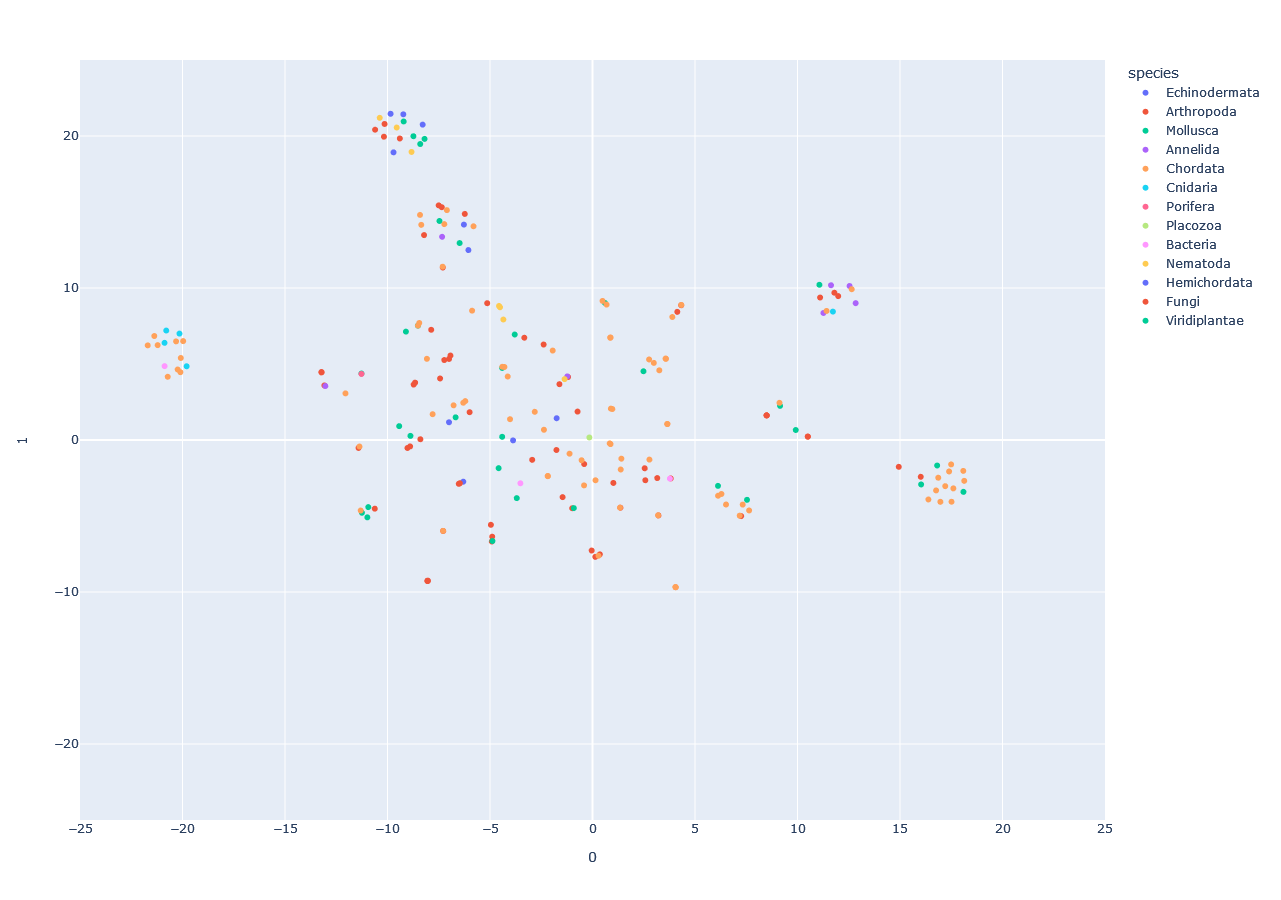

In [13]:
# component = 2 car on veut 2 dimensions
tsne_2d = TSNE(n_components=2, random_state=0)
proj_tsne_dist_2d = tsne_2d.fit_transform(dist_matrix)

tsne_dist_2d = px.scatter(
    proj_tsne_dist_2d, x=0, y=1,
    color=colour.Color_species, labels={'color': 'species'}
)
tsne_dist_2d.update_layout(xaxis_range=[-25, 25], yaxis_range=[-25, 25])
tsne_dist_2d.update_layout(width=1000, height=900)
tsne_dist_2d.update_xaxes(dtick=5)
tsne_dist_2d.show()

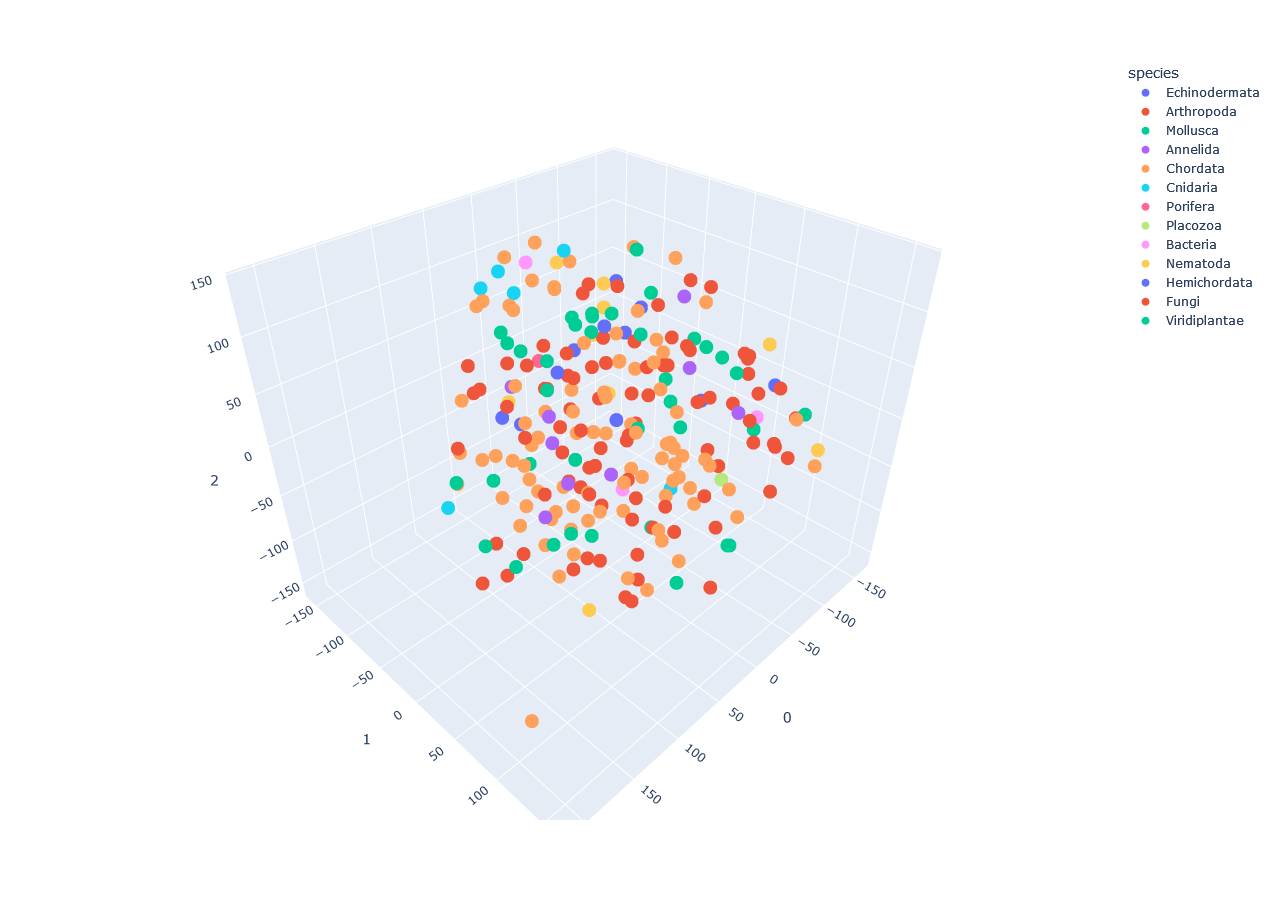

In [7]:
tsne_3d = TSNE(n_components=3, random_state=0)
proj_tsne_dist_3d = tsne_3d.fit_transform(dist_matrix)

tsne_dist_3d = px.scatter_3d(
    proj_tsne_dist_3d, x=0, y=1, z=2,
    color=colour.Color_species, labels={'color': 'species'}
)
tsne_dist_3d.update_traces(marker_size=8)
tsne_dist_3d.update_layout(xaxis_range=[-20, 20], yaxis_range=[-20, 20])
tsne_dist_3d.update_layout(width=1000, height=900)
tsne_dist_3d.update_xaxes(dtick=5)
tsne_dist_3d.show()

# UMAP

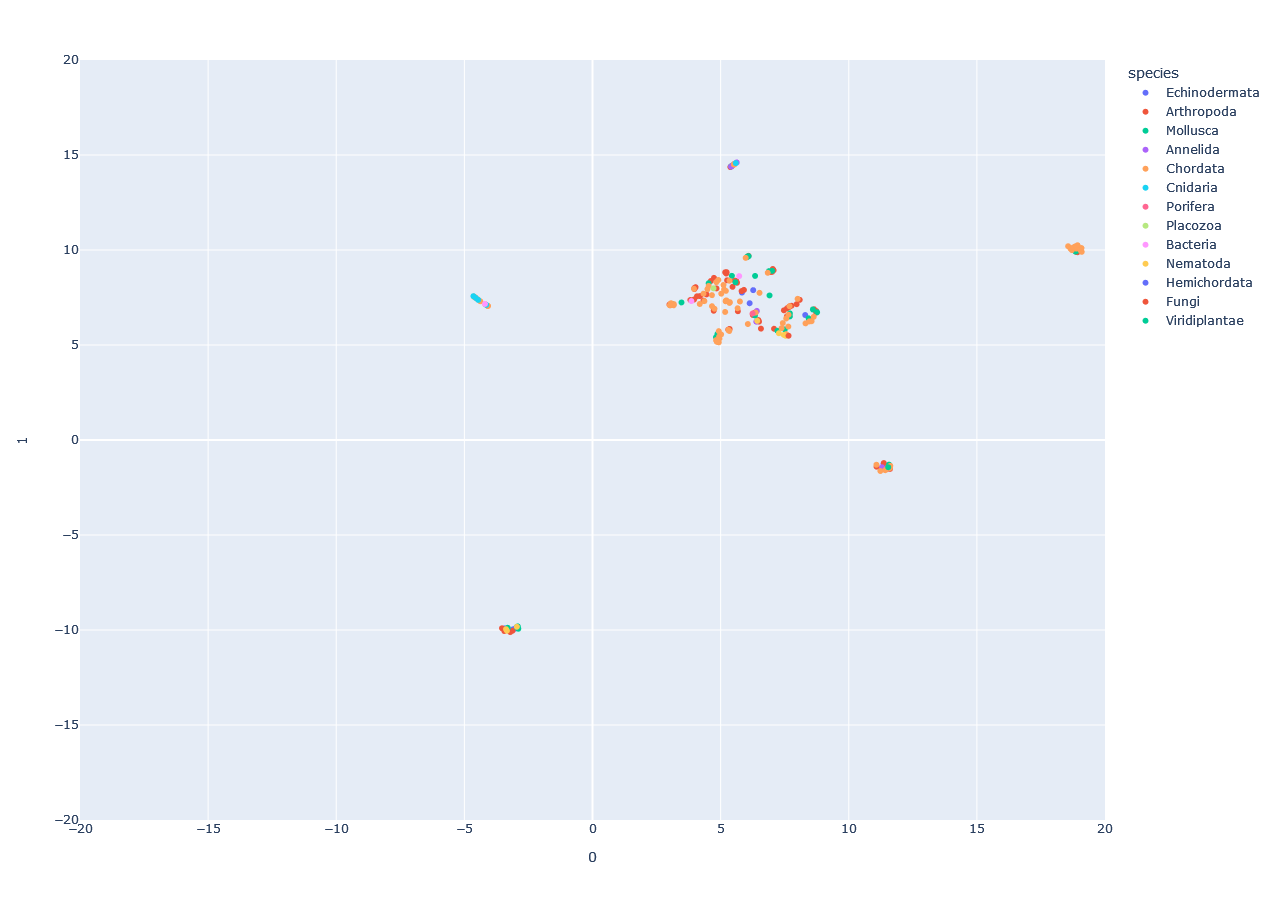

In [8]:
umap_phyl_2d = UMAP(n_components=2, random_state=0)
proj_umap_dist_2d = umap_phyl_2d.fit_transform(dist_matrix)

umap_dist_2d = px.scatter(
    proj_umap_dist_2d, x=0, y=1,
    color=colour.Color_species, labels={'color': 'species'}
)
umap_dist_2d.update_layout(xaxis_range=[-20, 20], yaxis_range=[-20, 20])
umap_dist_2d.update_layout(width=1000, height=900)
umap_dist_2d.update_xaxes(dtick=5)
umap_dist_2d.show()

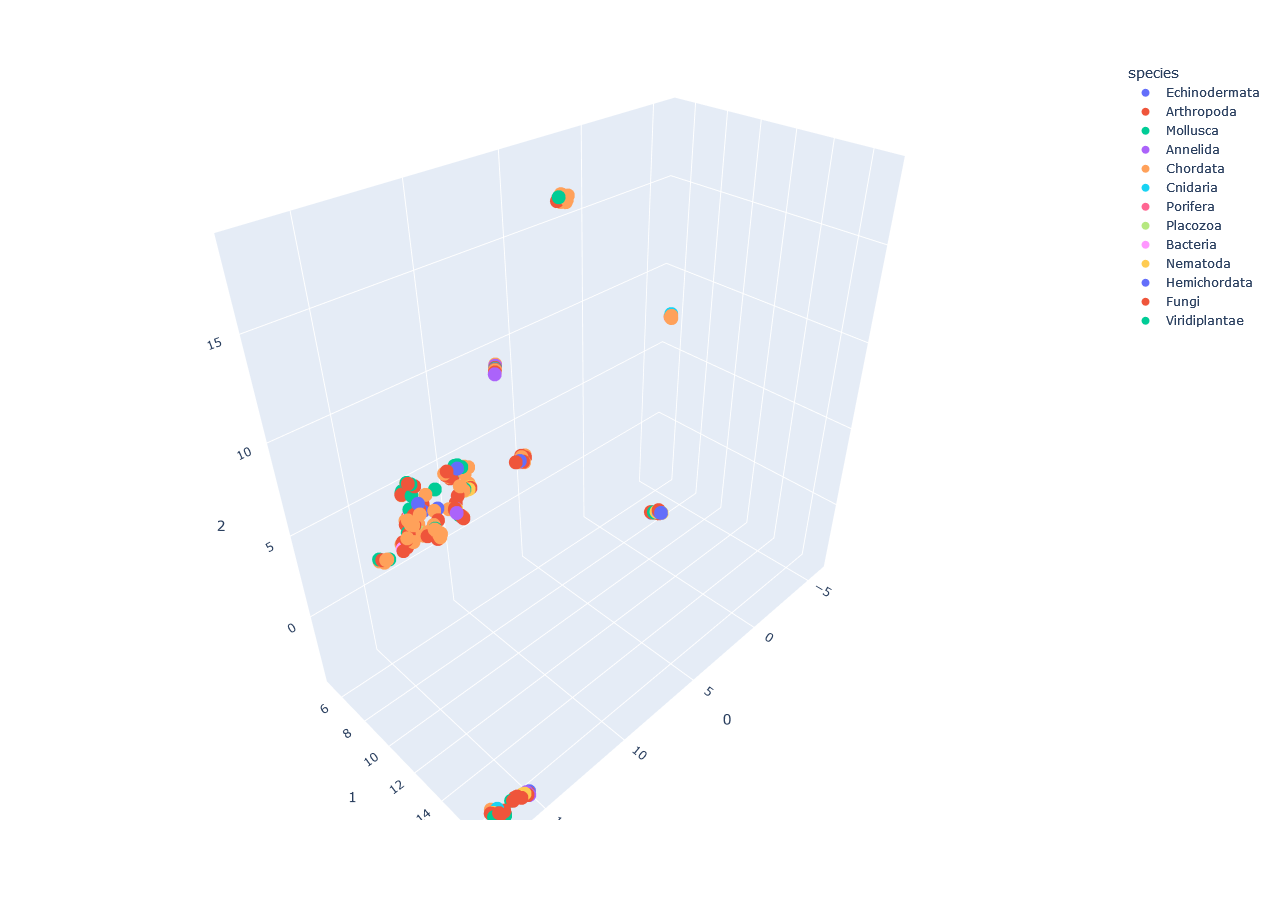

In [9]:
umap_3d = UMAP(n_components=3, random_state=0)
proj_umap_dist_3d = umap_3d.fit_transform(dist_matrix)

umap_dist_3d = px.scatter_3d(
    proj_umap_dist_3d, x=0, y=1, z=2,
    color=colour.Color_species, labels={'color': 'species'}
)
umap_dist_3d.update_traces(marker_size=8)
umap_dist_3d.update_layout(xaxis_range=[-20, 20], yaxis_range=[-20, 20])
umap_dist_3d.update_layout(width=1000, height=900)
umap_dist_3d.update_xaxes(dtick=5)
umap_dist_3d.show()

# Multi Dimensional Scaling

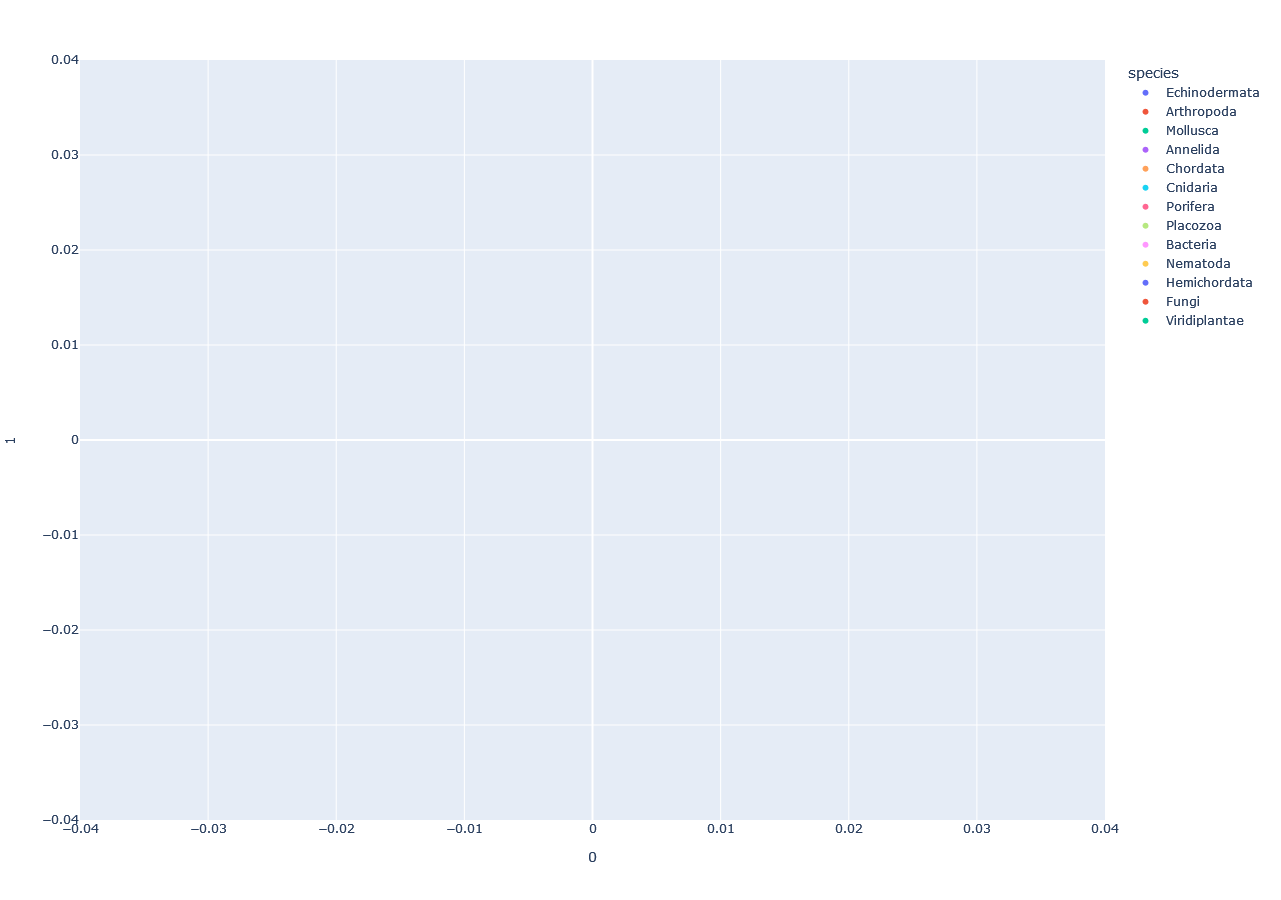

In [10]:
mds_dist_2d = MDS(dissimilarity='precomputed', random_state=0)
# Get the embeddings
proj_mds_dist_2d = mds_dist_2d.fit_transform(dist_matrix)


mds_dist_2d = px.scatter(
    proj_mds_dist_2d, x=0, y=1,
    color=colour.Color_species, labels={'color': 'species'}
)

mds_dist_2d.update_layout(xaxis_range=[-0.04, 0.04], yaxis_range=[-0.04, 0.04])
mds_dist_2d.update_layout(width=1000, height=900)
mds_dist_2d.update_xaxes(dtick=0.01)
mds_dist_2d.show()

# PCA

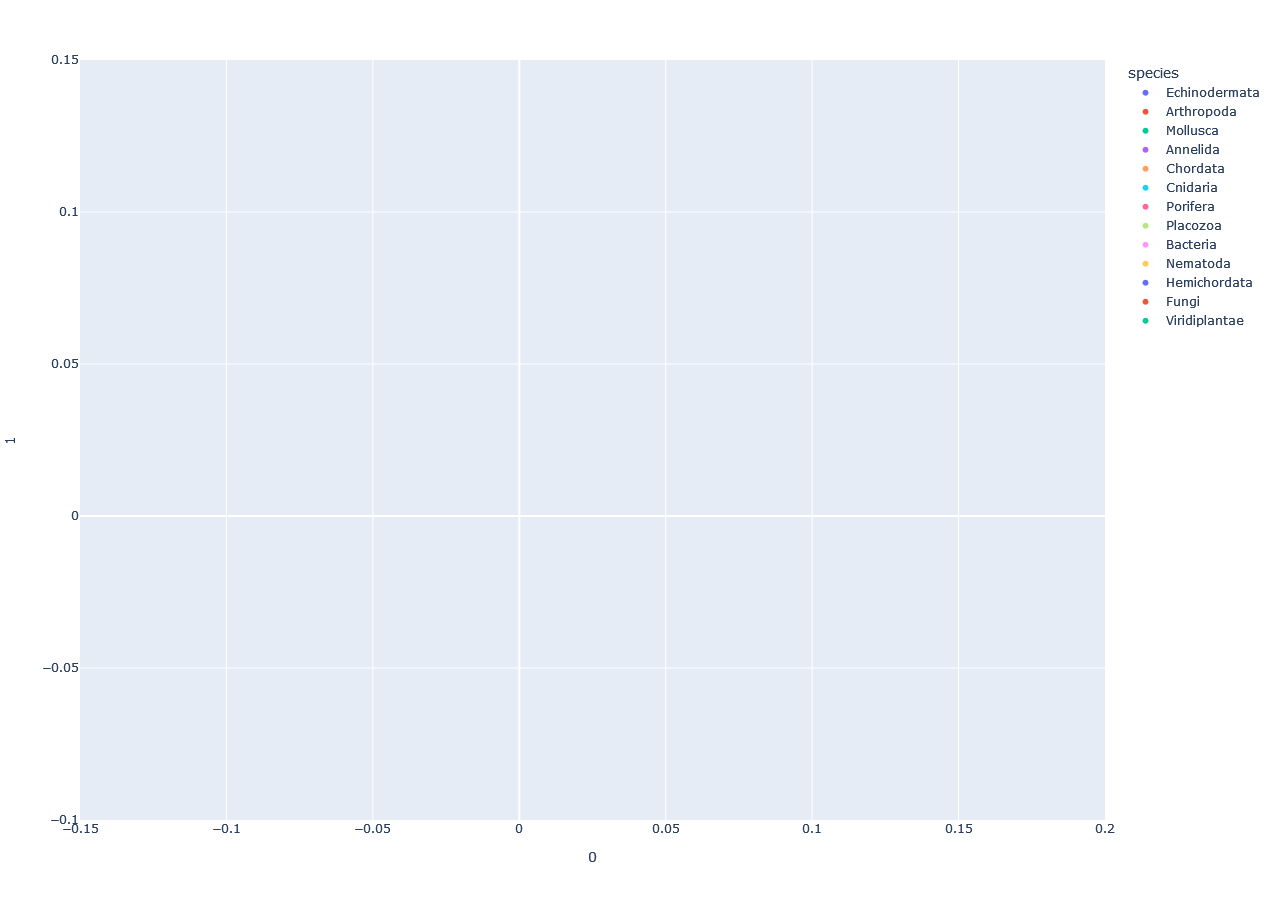

In [11]:
pca_dist_2d = PCA(n_components=2, random_state=0)
proj_pca_dist_2d = pca_dist_2d.fit_transform(dist_matrix)

pca_dist_2d = px.scatter(
    proj_pca_dist_2d, x=0, y=1,
    color=colour.Color_species, labels={'color': 'species'}
)

pca_dist_2d.update_layout(xaxis_range=[-0.15, 0.2], yaxis_range=[-0.1, 0.15])
pca_dist_2d.update_layout(width=1000, height=900)
pca_dist_2d.update_xaxes(dtick=0.05)
pca_dist_2d.show()